# Generating Layers from Renal MRI Data
In this tutorial we'll use the 3D Quantitative Layers (`qlayers`) package to analyse renal MRI data. The premise behind `qlayers` was first proposed by [Pruijm et al](https://doi.org/10.1007/s10334-019-00808-5) and is based on the idea to segment the kidney into layers based on each voxels distance from the surface of the kidney. The average of a quantitative parameter can be calculated for each layer producing profiles of, for example, $T_2^*$ with depth. The outer and inner layers are analogous to the cortex and medulla respectively while the gradient of the profile is representative of the cortico-medullary difference. `qlayers` extends this idea by allowing the user to define layers based on a 3D mask and apply the layer to any quantitative parameter.

The data used in this tutorial can be downloaded from [Zenodo](https://zenodo.org/records/14259406). In addition to the dependencies in `requirements.txt` this
notebook also needs you to add `jupyter`, `matplotlib` and `seaborn` to your Python environment.

In [1]:
# Import the dependencies we're going to need
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import seaborn as sns

from qlayers import QLayers, cortical_thickness, slope

sns.set()


def show_slice(img, slice, ax, cmap='gray', clim=None):
    if type(img) is str:
        img = nib.load(img)
    data = img.get_fdata()
    sl = data[:, :, slice]
    if clim is None:
        clim = (sl.min(), sl.max())
    ax.imshow(sl.T, origin='lower', cmap=cmap, clim=clim)
    ax.axis(False)

## Generating Layers
QLayers analysis is based around the `QLayers` object. This class takes a binary kidney mask and calculates the distance from every voxel in the kidneys to the surface of each kidney. We can the apply this information to interrogate quantitative maps of the kidneys acquired in the same session. The work by Pruijm et al uses layer analysis with $R_2^*$ maps so we'll do that here. The QLayers class does quite a lot of things automatically so we're going to run it, save lots of its outputs as niftis, then explore them.

In [2]:
# Load a 3D binary mask of the kidneys, this mask was made automatically from the T2-weighted anatomical scan, we're also going to load the anatomical so we can give the results some context in the body.
mask_img = nib.load('data/kidney_mask.nii.gz')
t2w_img = nib.load('data/t2w.nii.gz')
qlayers = QLayers(mask_img, thickness=5, pelvis_dist=10, space='layers')
qlayers.save_depth('data/depth.nii.gz')
qlayers.save_layers('data/layers.nii.gz')
qlayers.save_pelvis('data/pelvis.nii.gz')

Making Mesh
Smoothing Mesh


Pelvis Distance Calculation: 100%|██████████| 3/3 [00:11<00:00,  3.71s/it]


In the above cell we've taken our binary mask, filled any holes in the mask (usually caused by cysts) and segmented the renal pelvis (saved out as `pelvis.nii.gz`). The distance from the surface of the kidney to each voxel is then calculated (saved as `depth.nii.gz`), using the depth maps regions of interest labels are defined based on the `thickness` parameter (saved as `layers.nii.gz`). Here we've set the `thickness` to be 5 mm which is much more than usual, but means you can see the different layers in the figure below. Any tissue within 10 mm of the pelvis is excluded from the depth/layer maps as it is not representative of the rest of the kidney.

Text(0.5, 1.0, 'Layers')

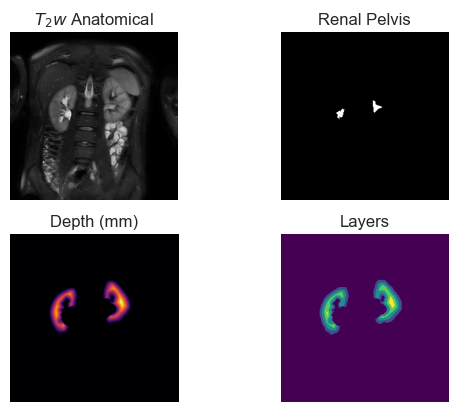

In [3]:
fig, ax = plt.subplots(2, 2)
sl = 8
show_slice(t2w_img, sl, ax[0, 0])
ax[0, 0].set_title('$T_2w$ Anatomical')
show_slice('data/pelvis.nii.gz', sl, ax[0, 1])
ax[0, 1].set_title('Renal Pelvis')
show_slice('data/depth.nii.gz', sl, ax[1, 0], cmap='inferno')
ax[1, 0].set_title('Depth (mm)')
show_slice('data/layers.nii.gz', sl, ax[1, 1], cmap='viridis')
ax[1, 1].set_title('Layers')